In [1]:
## dataframes, matrices and plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [2]:
train_path = "x__data/train"
test_path = "x__data/test"


client_train = pd.read_csv(f"{train_path}/client_train.csv")
invoice_train = pd.read_csv(f"{train_path}/invoice_train.csv", low_memory=False)

client_test = pd.read_csv(f"{test_path}/client_test.csv")
invoice_test = pd.read_csv(f"{test_path}/invoice_test.csv")

# Inspecting the data

In [3]:
client_train.head()

,disrict,client_id,client_catg,region,creation_date,target
0,60,train_Client_0,11,101,31/12/1994,0.0
1,69,train_Client_1,11,107,29/05/2002,0.0
2,62,train_Client_10,11,301,13/03/1986,0.0
3,69,train_Client_100,11,105,11/07/1996,0.0
4,62,train_Client_1000,11,303,14/10/2014,0.0


In [4]:
invoice_train.head()

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC


In [5]:
client_train["target"].value_counts(normalize=True)

target
0.0    0.944159
1.0    0.055841
Name: proportion, dtype: float64

## Merging

In [6]:
client_merged = pd.merge(client_train, invoice_train, on="client_id")

## EXPLORATORY DATA ANALYSIS

#### Separating cats and numericals

In [7]:
merged_numerical = client_merged.select_dtypes("number")
merged_cat = client_merged.select_dtypes("object")

#### Looking at numericals

In [8]:
merged_numerical

,disrict,client_catg,region,target,tarif_type,counter_number,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number
0,60,11,101,0.0,11,1335667,203,8,1,82,0,0,0,14302,14384,4
1,60,11,101,0.0,11,1335667,203,6,1,1200,184,0,0,12294,13678,4
2,60,11,101,0.0,11,1335667,203,8,1,123,0,0,0,14624,14747,4
3,60,11,101,0.0,11,1335667,207,8,1,102,0,0,0,14747,14849,4
4,60,11,101,0.0,11,1335667,207,9,1,572,0,0,0,15066,15638,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4476744,60,11,101,0.0,10,1253571,202,9,1,400,135,0,0,3197,3732,8
4476745,60,11,101,0.0,10,1253571,202,6,1,200,6,0,0,3732,3938,4
4476746,60,11,101,0.0,11,560948,203,6,1,259,0,0,0,13884,14143,4
4476747,60,11,101,0.0,11,560948,203,6,1,603,0,0,0,13281,13884,4


In [9]:
merged_numerical.describe()

,disrict,client_catg,region,target,tarif_type,counter_number,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number
count,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06
mean,6.348246e+01,1.194381e+01,2.103584e+02,7.887688e-02,2.012804e+01,1.230587e+11,1.724884e+02,7.321702e+00,1.003040e+00,4.109795e+02,1.093225e+02,2.030620e+01,5.292588e+01,1.776700e+04,1.834970e+04,4.483095e+01
std,3.273403e+00,6.022452e+00,1.035828e+02,2.695465e-01,1.347256e+01,1.657267e+12,1.338871e+02,1.571654e+00,3.083466e-01,7.573080e+02,1.220123e+03,1.574239e+02,8.754725e+02,4.036693e+04,4.095321e+04,3.128335e+03
min,6.000000e+01,1.100000e+01,1.010000e+02,0.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.200000e+01,1.100000e+01,1.030000e+02,0.000000e+00,1.100000e+01,1.211080e+05,5.000000e+00,6.000000e+00,1.000000e+00,7.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.791000e+03,2.056000e+03,4.000000e+00
50%,6.200000e+01,1.100000e+01,3.010000e+02,0.000000e+00,1.100000e+01,4.945610e+05,2.030000e+02,8.000000e+00,1.000000e+00,2.740000e+02,0.000000e+00,0.000000e+00,0.000000e+00,7.690000e+03,8.192000e+03,4.000000e+00
75%,6.300000e+01,1.100000e+01,3.090000e+02,0.000000e+00,4.000000e+01,1.115161e+06,2.070000e+02,9.000000e+00,1.000000e+00,6.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,2.166000e+04,2.234300e+04,4.000000e+00
max,6.900000e+01,5.100000e+01,3.990000e+02,1.000000e+00,4.500000e+01,2.798115e+13,6.000000e+02,4.130000e+02,5.000000e+01,9.999100e+05,9.990730e+05,6.449200e+04,5.479460e+05,2.800280e+06,2.870972e+06,6.366240e+05


#### Number of unique values in each `numerical`. Can give idea about categorical numericals

In [10]:
merged_numerical.nunique()

disrict                      4
client_catg                  3
region                      25
target                       2
tarif_type                  17
counter_number          201893
counter_code                42
reading_remarque             8
counter_coefficient         16
consommation_level_1      8295
consommation_level_2     12576
consommation_level_3      2253
consommation_level_4     12075
old_index               155648
new_index               157980
months_number             1370
dtype: int64

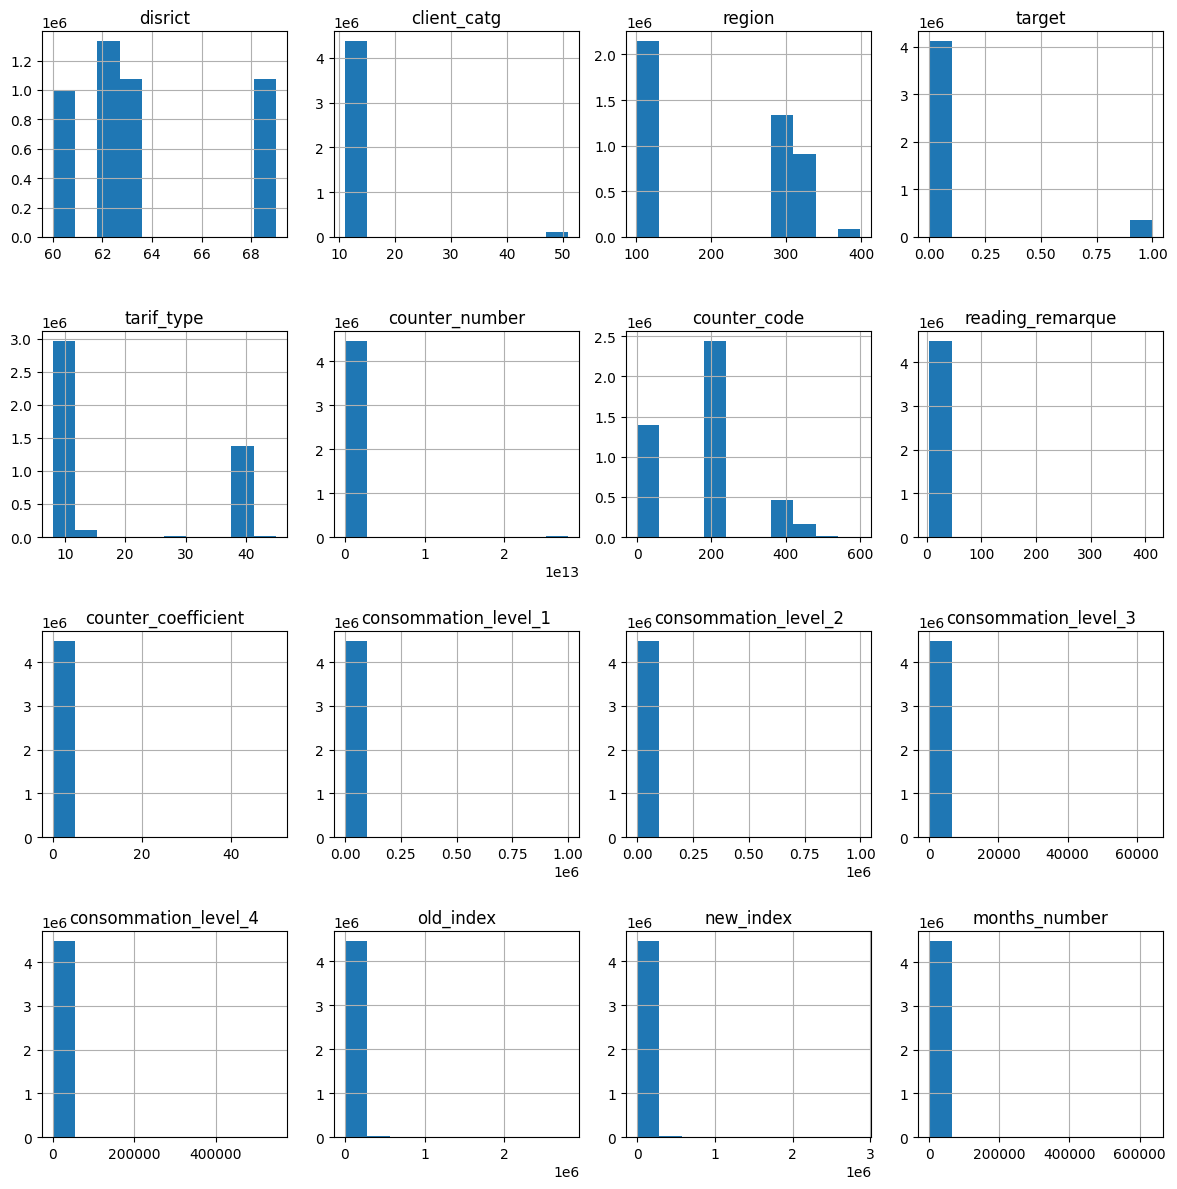

In [11]:
merged_numerical.hist(figsize=(12,12))
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

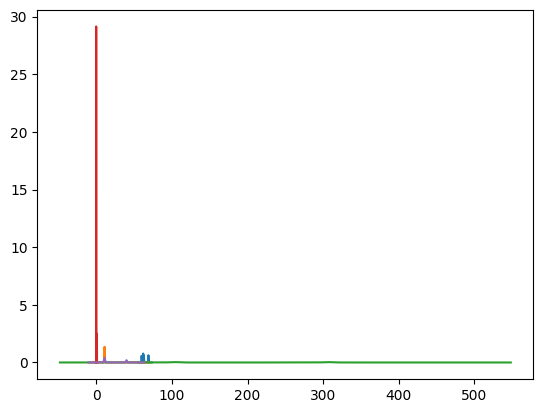

In [12]:
# merged_numerical.plot(kind="density")

In [58]:
# invoice_train[invoice_train.client_id == invoice_train.client_id.sample().values[0]].sort_values("invoice_date")
frauds = client_train[client_train["target"]==1]["client_id"].values
non_frauds = client_train[client_train["target"]==0]["client_id"].values

In [67]:
invoice_train[(invoice_train["client_id"] == np.random.choice(frauds)) & (invoice_train["counter_type"]=="ELEC")].sort_values("invoice_date")

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
1769632,train_Client_26271,2006-06-06,11,315640,0,203,6,1,443,0,0,0,9731,10174,4,ELEC
1769629,train_Client_26271,2006-07-02,11,315640,0,203,6,1,543,0,0,0,9188,9731,4,ELEC
1769628,train_Client_26271,2007-01-02,11,315640,0,203,6,1,1300,0,0,0,10174,11474,8,ELEC
1769627,train_Client_26271,2007-04-06,11,315640,0,203,6,1,772,0,0,0,11474,12246,4,ELEC
1769626,train_Client_26271,2007-09-27,11,315640,0,203,6,1,480,0,0,0,12246,12726,4,ELEC
1769624,train_Client_26271,2008-03-06,11,315640,0,203,6,1,450,0,0,0,13400,13850,4,ELEC
1769625,train_Client_26271,2008-04-02,11,315640,0,203,6,1,674,0,0,0,12726,13400,4,ELEC
1769622,train_Client_26271,2009-01-06,11,315640,0,203,6,1,635,0,0,0,14565,15200,4,ELEC
1769618,train_Client_26271,2009-01-28,11,315640,0,203,6,1,715,0,0,0,13850,14565,8,ELEC
1769621,train_Client_26271,2009-09-28,11,315640,0,203,6,1,536,0,0,0,15200,15736,4,ELEC


In [65]:
invoice_train[(invoice_train["client_id"] == np.random.choice(non_frauds)) & (invoice_train["counter_type"]=="ELEC")].sort_values("invoice_date")

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
769766,train_Client_120810,2008-10-23,11,51060,1,207,6,1,4,0,0,0,0,4,2,ELEC
769746,train_Client_120810,2009-02-03,11,51060,5,207,6,1,0,0,0,0,4,4,2,ELEC
769731,train_Client_120810,2009-10-28,11,51069,0,207,8,1,296,0,0,0,2389,2685,2,ELEC
769771,train_Client_120810,2010-01-10,11,51069,0,207,6,1,725,0,0,0,4227,4952,4,ELEC
769769,train_Client_120810,2010-03-06,11,51069,0,207,6,1,787,0,0,0,3440,4227,4,ELEC
769767,train_Client_120810,2010-05-02,11,51069,0,207,6,1,600,155,0,0,2685,3440,2,ELEC
769777,train_Client_120810,2011-05-10,11,51069,0,207,8,1,3,0,0,0,6241,6244,4,ELEC
769773,train_Client_120810,2011-07-02,11,51069,0,207,6,1,684,0,0,0,4952,5636,4,ELEC
769775,train_Client_120810,2011-07-06,11,51069,0,207,6,1,605,0,0,0,5636,6241,4,ELEC
769757,train_Client_120810,2012-05-29,11,51069,0,207,8,1,1262,0,0,0,7489,8751,6,ELEC


## Looking at categorical

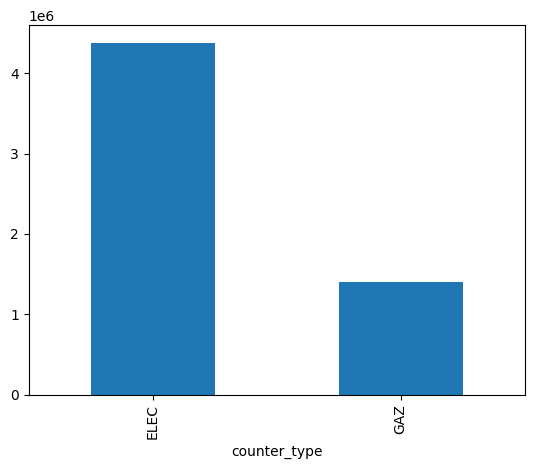

In [19]:
for col in merged_cat.columns:
    merged_cat[col].value_counts().plot(kind="bar", xlabel=col, ylabel="count")
    plt.show()

# IDEAS

- difference between previous and next invoice consommation
- cyclical pattern in consommation